In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
import tensorflow as tf
# from keras import models
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [6]:
regressor = tf.keras.Sequential()

In [7]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [8]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(Dense(units= 1))

In [12]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [13]:
regressor.fit(X_train, y_train, epochs= 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 18s 147ms/step - loss: 0.0493
Epoch 2/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0043
Epoch 13/100

In [14]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis= 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\Arhamsoft\AppData\Local\Temp\ipykernel_18284\2889304221.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


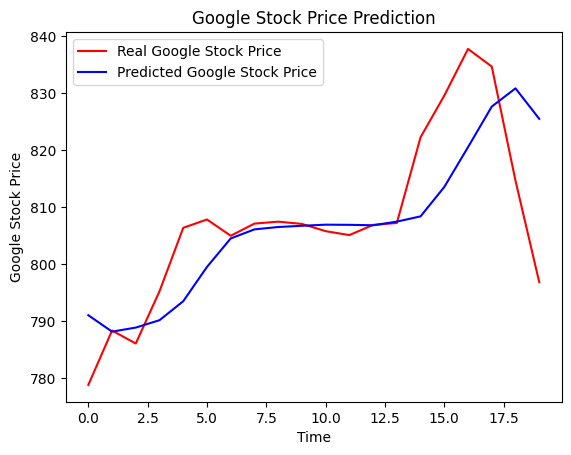

In [16]:
plt.plot(real_stock_price, color = 'red', label= 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label= 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [17]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [19]:
X_train.shape

(1198, 60, 1)

In [25]:
X_train[1]

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.03675869],
       [0.044

In [22]:
training_set_scaled.shape

(1258, 1)

In [23]:
training_set_scaled[1]

array([0.09701243])

In [24]:
y_train.shape

(1198,)